In [15]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [16]:
campañasIniciales=10

In [17]:
Carpeta=r"C:\Users\williamtorres\OneDrive - CETCO S.A\Rolling forecast\Corrida 09.06.2025"

# Venta Corporaritiva

In [18]:
df_ventaCorp=  pd.read_csv(Carpeta+'\\Resultado CORP\\VentaCorp.csv')
df_ventaCorp.index = range(1, len(df_ventaCorp) + 1)
df_ventaCorp.head()

,2024,2025,2026,2027,2028
1,10201132.0,11341249.0,1.175185e+07,1.218285e+07,1.259638e+07
2,10969621.0,11827090.0,1.225528e+07,1.270475e+07,1.313599e+07
3,10916859.0,11363576.0,1.177498e+07,1.220684e+07,1.262117e+07
4,10975691.0,11120895.0,1.152352e+07,1.194615e+07,1.235164e+07
5,11261977.0,11789320.0,1.221614e+07,1.266417e+07,1.309404e+07


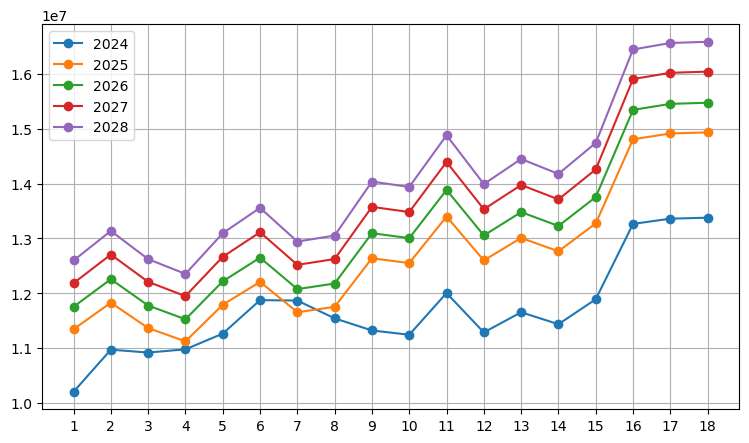

In [53]:
# Crea la figura y el eje con el tamaño correcto
fig, ax = plt.subplots(figsize=(9, 5))

# Pasa el eje al gráfico para que respete el tamaño
df_ventaCorp.plot(kind='line', marker='o', ax=ax)

ax.set_xticks(range(1, 19))  # Etiquetas del eje X de 1 a 18
ax.grid(True)

plt.show()

# Uniendo Corporativo menos PR

In [20]:
df_Linea=  pd.read_excel(Carpeta+'\\Resultado CORP\\Rolling-Forecast.XLSM', sheet_name='Final')
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,106,0.014352,-0.063517,0,210098324,0,177,225,857,...,0,0,0,0,0,0,0,0,0,202610
1,CO03,106,0.014352,-0.063517,0,200036215,0,0,0,0,...,696,750,699,725,710,742,839,846,847,202610
2,CO03,106,0.014352,-0.063517,0,210092104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202610
3,CO03,106,0.014352,-0.063517,0,210093082,0,0,0,0,...,648,698,651,675,661,691,781,787,788,202610
4,CO03,106,0.014352,-0.063517,0,210093312,122,0,0,0,...,159,171,159,165,161,168,190,192,192,202610


In [21]:
df_NovoApp=  pd.read_excel(Carpeta+'\\Resultado CORP\\novoAppForecast.XLSM', sheet_name='Final')
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,BO03,101,0.037674,0.034939,0,200115806,1488,504,679,707,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,202612
1,BO03,101,0.037674,0.034939,0,200115820,468,29,595,179,...,0,0,0,0,0,0,0,0,0,202610
2,BO03,101,0.037674,0.034939,0,200117098,371,20,1257,125,...,782,782,782,782,782,782,782,782,782,202612
3,BO03,101,0.037674,0.034939,0,200117127,480,606,1520,1762,...,603,603,603,603,603,603,603,603,603,202610
4,BO03,101,0.037674,0.034939,0,200117264,228,221,234,1020,...,945,945,945,945,945,945,945,945,945,202613


In [22]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,106,210098324,0,177,225,857,7811,384,738,...,0,0,0,0,0,0,0,0,0,202610
1,CO03,106,200036215,0,0,0,0,576,0,0,...,696,750,699,725,710,742,839,846,847,202610
2,CO03,106,210092104,0,0,0,0,220,209,0,...,0,0,0,0,0,0,0,0,0,202610
3,CO03,106,210093082,0,0,0,0,219,0,0,...,648,698,651,675,661,691,781,787,788,202610
4,CO03,106,210093312,122,0,0,0,0,0,0,...,159,171,159,165,161,168,190,192,192,202610


In [23]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,BO03,101,200115806,1488,504,679,707,1047,629,1596,...,1355,1355,1355,1355,1355,1355,1355,1355,1355,202612
1,BO03,101,200115820,468,29,595,179,1624,0,0,...,0,0,0,0,0,0,0,0,0,202610
2,BO03,101,200117098,371,20,1257,125,567,2,961,...,782,782,782,782,782,782,782,782,782,202612
3,BO03,101,200117127,480,606,1520,1762,1006,2429,598,...,603,603,603,603,603,603,603,603,603,202610
4,BO03,101,200117264,228,221,234,1020,356,880,233,...,945,945,945,945,945,945,945,945,945,202613


In [24]:
df_PronosticoCOR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [25]:
df_PronosticoCOR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ce.                     14247 non-null  object
 1   Grupo art.              14247 non-null  int64 
 2   Código SAP              14247 non-null  int64 
 3   202601                  14247 non-null  int64 
 4   202602                  14247 non-null  int64 
 5   202603                  14247 non-null  int64 
 6   202604                  14247 non-null  int64 
 7   202605                  14247 non-null  int64 
 8   202606                  14247 non-null  int64 
 9   202607                  14247 non-null  int64 
 10  202608                  14247 non-null  int64 
 11  202609                  14247 non-null  int64 
 12  202610                  14247 non-null  int64 
 13  202611                  14247 non-null  int64 
 14  202612                  14247 non-null  int64 
 15  20

# Uniendo  PR

In [26]:
df_Linea=  pd.read_excel(Carpeta+'\\Resultado PR03\\Rolling-Forecast.XLSM', sheet_name='Final')
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,106,0.014352,-0.063517,0,210098324,0,101,17,60,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,104,0.037174,0.074587,0,200116053,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,104,0.037174,0.074587,0,200116055,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,104,0.037174,0.074587,0,200116057,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,104,0.037174,0.074587,0,200116629,48,0,101,0,...,0,0,0,0,0,0,0,0,0,202612


In [27]:
df_NovoApp=  pd.read_excel(Carpeta+'\\Resultado PR03\\novoAppForecast.XLSM', sheet_name='Final')
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,0.037674,0.034939,0,200115806,229,229,229,229,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,101,0.037674,0.034939,0,200115820,84,84,84,84,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,101,0.037674,0.034939,0,200117098,91,91,91,91,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,101,0.037674,0.034939,0,200117127,95,95,95,95,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,101,0.037674,0.034939,0,200117264,260,260,260,260,...,0,0,0,0,0,0,0,0,0,202612


In [28]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,106,210098324,0,101,17,60,61,61,0,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,104,200116053,0,0,0,0,0,21,0,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,104,200116055,0,0,0,0,0,34,0,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,104,200116057,0,0,0,0,0,43,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,104,200116629,48,0,101,0,135,0,0,...,0,0,0,0,0,0,0,0,0,202612


In [29]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,200115806,229,229,229,229,229,229,229,...,0,0,0,0,0,0,0,0,0,202612
1,PR03,101,200115820,84,84,84,84,84,84,84,...,0,0,0,0,0,0,0,0,0,202612
2,PR03,101,200117098,91,91,91,91,91,91,91,...,0,0,0,0,0,0,0,0,0,202612
3,PR03,101,200117127,95,95,95,95,95,0,0,...,0,0,0,0,0,0,0,0,0,202612
4,PR03,101,200117264,260,260,260,260,260,260,260,...,0,0,0,0,0,0,0,0,0,202612


In [30]:
df_PronosticoPR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [31]:
df_PronosticoPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ce.                     760 non-null    object
 1   Grupo art.              760 non-null    int64 
 2   Código SAP              760 non-null    int64 
 3   202601                  760 non-null    int64 
 4   202602                  760 non-null    int64 
 5   202603                  760 non-null    int64 
 6   202604                  760 non-null    int64 
 7   202605                  760 non-null    int64 
 8   202606                  760 non-null    int64 
 9   202607                  760 non-null    int64 
 10  202608                  760 non-null    int64 
 11  202609                  760 non-null    int64 
 12  202610                  760 non-null    int64 
 13  202611                  760 non-null    int64 
 14  202612                  760 non-null    int64 
 15  202613

# Uniendo PR y COR

In [32]:
df_Pronostico = pd.concat([df_PronosticoCOR, df_PronosticoPR], ignore_index=True, sort=False)

In [33]:
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ce.                     15007 non-null  object 
 1   Grupo art.              15007 non-null  int64  
 2   Código SAP              15007 non-null  int64  
 3   202601                  15007 non-null  int64  
 4   202602                  15007 non-null  int64  
 5   202603                  15007 non-null  int64  
 6   202604                  15007 non-null  int64  
 7   202605                  15007 non-null  int64  
 8   202606                  15007 non-null  int64  
 9   202607                  15007 non-null  int64  
 10  202608                  15007 non-null  int64  
 11  202609                  15007 non-null  int64  
 12  202610                  15007 non-null  int64  
 13  202611                  15007 non-null  int64  
 14  202612                  15007 non-null

In [34]:
df_Pronostico=df_Pronostico.fillna(0)
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ce.                     15007 non-null  object 
 1   Grupo art.              15007 non-null  int64  
 2   Código SAP              15007 non-null  int64  
 3   202601                  15007 non-null  int64  
 4   202602                  15007 non-null  int64  
 5   202603                  15007 non-null  int64  
 6   202604                  15007 non-null  int64  
 7   202605                  15007 non-null  int64  
 8   202606                  15007 non-null  int64  
 9   202607                  15007 non-null  int64  
 10  202608                  15007 non-null  int64  
 11  202609                  15007 non-null  int64  
 12  202610                  15007 non-null  int64  
 13  202611                  15007 non-null  int64  
 14  202612                  15007 non-null

# Limpiando Data

In [35]:
Categoria=df_Pronostico['Grupo art.'].unique()
print(Categoria)
CDP=df_Pronostico['Ce.'].unique()
print(CDP)

[101 102 104 105 103 106]
['BO03' 'CL03' 'CO03' 'CR03' 'DO03' 'EC03' 'GT23' 'MX03' 'PA33' 'PE03'
 'SV13' 'PR03']


In [36]:
añoActual = datetime.now().year

In [37]:
df_Pronostico.columns = df_Pronostico.columns.astype(str)

In [38]:
# Iterar sobre los años desde el año actual hasta 4 años después
for i in range(añoActual, añoActual + 4):  # +5 para incluir hasta añoActual + 4
    # Filtrar columnas que inician con el año actual en la iteración
    columnas_AñoX = [col for col in df_Pronostico.columns if col.startswith(str(i))]
    
    # Si hay columnas de ese año, sumarlas en una nueva columna
    if columnas_AñoX:
        df_Pronostico['Total_' + str(i)] = df_Pronostico[columnas_AñoX].sum(axis=1)


In [39]:
# Mostrar el DataFrame actualizado
df_Pronostico.head()


,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,Total_2026,Total_2027,Total_2028
0,BO03,101,200115806,1488,504,679,707,1047,629,1596,...,1355,1355.0,1355.0,1355.0,1355.0,1355.0,202612,19939.0,23562.0,24390.0
1,BO03,101,200115820,468,29,595,179,1624,0,0,...,0,0.0,0.0,0.0,0.0,0.0,202610,2895.0,0.0,0.0
2,BO03,101,200117098,371,20,1257,125,567,2,961,...,782,782.0,782.0,782.0,782.0,782.0,202612,10613.0,13608.0,14076.0
3,BO03,101,200117127,480,606,1520,1762,1006,2429,598,...,603,603.0,603.0,603.0,603.0,603.0,202610,14547.0,10494.0,10854.0
4,BO03,101,200117264,228,221,234,1020,356,880,233,...,945,945.0,945.0,945.0,945.0,945.0,202613,12484.0,16434.0,17010.0


# Calculando Total por Categoría

In [40]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Grupo art.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Grupo art.,,,
101,85598099.0,96438474.0,99723532.0
102,59557445.0,60216377.0,62253545.0
103,54192682.0,59509624.0,61521975.0
104,16715247.0,13184508.0,13636185.0
105,13862437.0,16011778.0,16554297.0


In [41]:
Traduciones = {
    "Grupo art.": [101, 102, 103, 104, 105, 106],
    "Categoría": [
        "Fragancias",
        "Maquillaje",
        "Cuidado Personal",
        "Tratamiento Facial",
        "Tratamiento Corporal",
        "Accesorios Cosméticos",
    ],
}
df_Traducciones = pd.DataFrame(Traduciones)
tabla_final = tabla_pivot_Pronostico.merge(df_Traducciones, on="Grupo art.", how="left")

In [42]:
tabla_final = tabla_final.set_index("Categoría")[Valores]
tabla_pivot_Pronostico=tabla_final

In [43]:
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Categoría,,,
Fragancias,85598099.0,96438474.0,99723532.0
Maquillaje,59557445.0,60216377.0,62253545.0
Cuidado Personal,54192682.0,59509624.0,61521975.0
Tratamiento Facial,16715247.0,13184508.0,13636185.0
Tratamiento Corporal,13862437.0,16011778.0,16554297.0


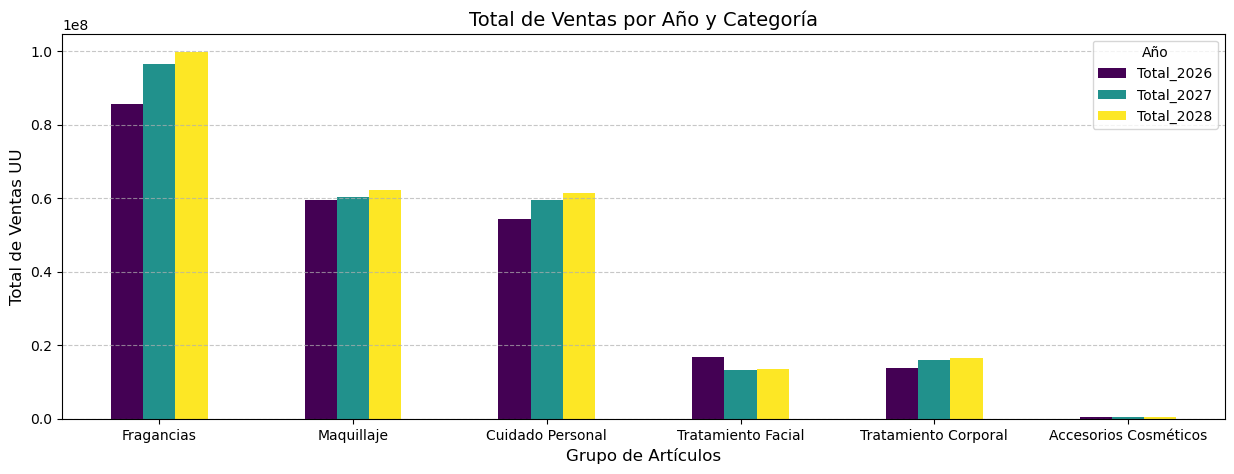

In [44]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')

# Personalizar la gráfica
plt.title('Total de Ventas por Año y Categoría', fontsize=14)
plt.xlabel('Grupo de Artículos', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar la gráfica
plt.show()

# Calculando por CDP

In [45]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Ce.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,5739633.0,6598462.0,6820631.0
CL03,18852901.0,19109089.0,19759687.0
CO03,71838273.0,80726372.0,83466718.0
CR03,7215622.0,7416262.0,7666976.0
DO03,11543165.0,13552808.0,14010825.0


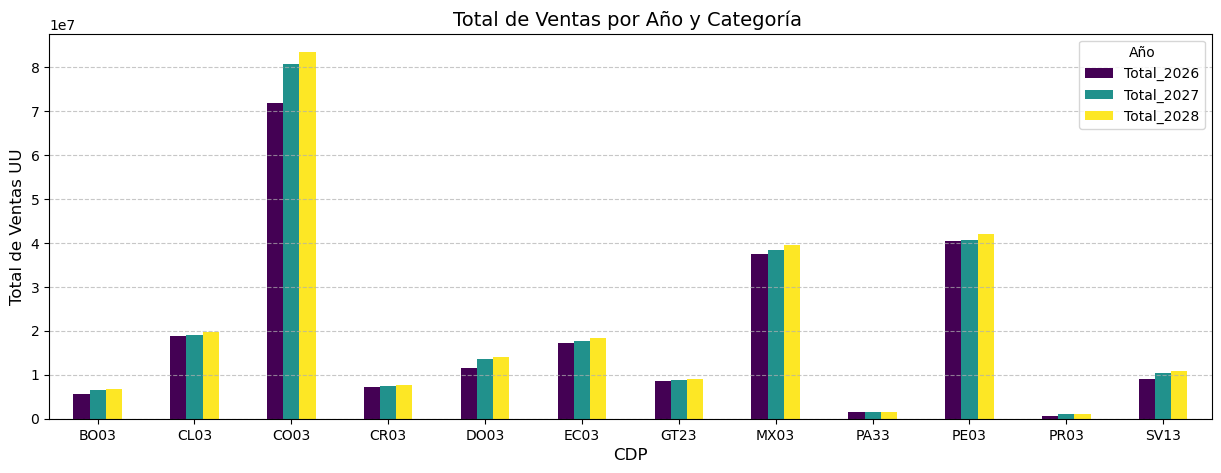

In [46]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')

# Personalizar la gráfica
plt.title('Total de Ventas por Año y Categoría ', fontsize=14)
plt.xlabel('CDP', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [47]:
tabla_pivot_Pronostico

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,5739633.0,6598462.0,6820631.0
CL03,18852901.0,19109089.0,19759687.0
CO03,71838273.0,80726372.0,83466718.0
CR03,7215622.0,7416262.0,7666976.0
DO03,11543165.0,13552808.0,14010825.0
EC03,17293417.0,17702706.0,18301482.0
GT23,8595184.0,8785224.0,9082635.0
MX03,37519514.0,38329594.0,39635810.0
PA33,1603835.0,1494639.0,1544144.0


# Calculando códigos activos por campaña y categoría

In [48]:
df_agrupado = df_PronosticoCOR.groupby(["Código SAP"]).sum().reset_index()

In [49]:
df_agrupado.head()

,Código SAP,Ce.,Grupo art.,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,200036215,CO03PE03CL03BO03CR03DO03,636,0,0,0,0,2357,0,0,...,2741,2951,2750,2853,2792,2918,3300,3327,3331,1215660
1,200039855,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111,112952,95083,145225,70737,125060,127160,97977,...,176104,189691,176868,183449,179542,187680,212227,213923,214247,2228710
2,200041645,MX03EC03GT23SV13,424,0,0,0,234,1257,0,0,...,1815,1955,1822,1890,1849,1933,2185,2202,2205,810440
3,200060753,MX03,101,4239,1436,366,0,1189,1878,1584,...,3006,3238,3019,3131,3064,3203,3622,3651,3657,202610
4,200060760,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111,59497,42360,40494,34637,40635,36868,40091,...,55558,59843,55798,57875,56642,59208,66952,67488,67590,2228710


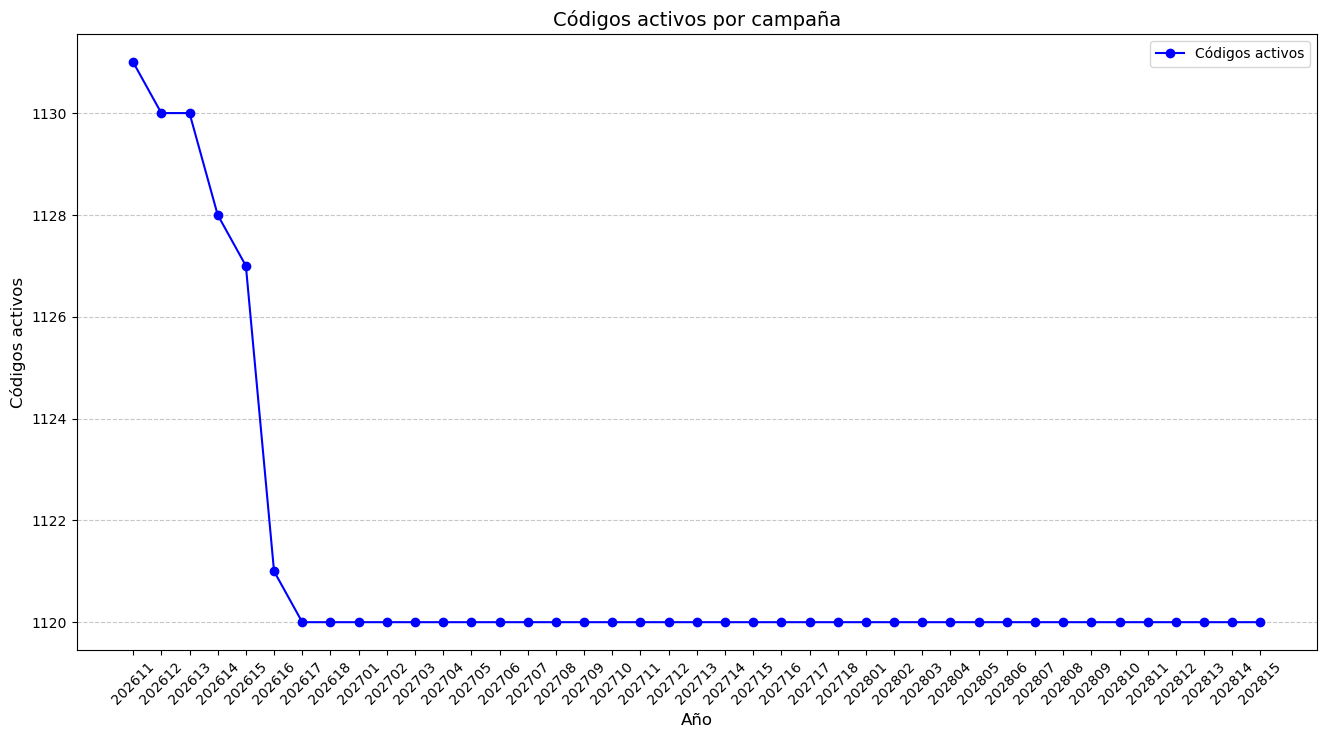

In [56]:

# Contar valores diferentes de 0 por columna
conteo_no_ceros = (df_agrupado.iloc[:, 3+campañasIniciales:] != 0).sum()
conteo_no_ceros = conteo_no_ceros[:-4]
conteo_no_ceros.index = conteo_no_ceros.index.astype(str)
# Crear la gráfica de línea
# FORZAR que se muestren todas las etiquetas en el eje X

plt.figure(figsize=(16, 8))
plt.plot(conteo_no_ceros.index, conteo_no_ceros, marker='o', color='b', label="Códigos activos")
plt.title("Códigos activos por campaña", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Códigos activos", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Mostrar la gráfica
plt.show()